In [1]:
from rustyspikes import *

In [2]:
model = load_model('models/apparent_2.pkl')

Loaded the following model:
{'Neurons': {0: <neurons.Spikes_at_will object at 0x00000231A045E690>, 1: <neurons.Spikes_at_will object at 0x00000231A045EAD0>, 2: <neurons.Spikes_at_will object at 0x00000231A045EB50>, 3: <neurons.Spikes_at_will object at 0x00000231A045EBD0>, 4: <neurons.Spikes_at_will object at 0x00000231A045EC50>, 5: <neurons.Izhikevich object at 0x00000231A045ECD0>, 6: <neurons.Izhikevich object at 0x00000231A045EE10>, 7: <neurons.Izhikevich object at 0x00000231A045EF10>, 8: <neurons.Izhikevich object at 0x00000231A045F010>, 9: <neurons.Izhikevich object at 0x00000231A045F110>, 10: <neurons.Izhikevich object at 0x00000231A045F210>, 11: <neurons.Izhikevich object at 0x00000231A045F310>, 12: <neurons.Izhikevich object at 0x00000231A045F410>, 13: <neurons.Izhikevich object at 0x00000231A045F510>, 14: <neurons.Izhikevich object at 0x00000231A045F610>}, 'Synapses': {(0, 5): <synaptics.Synapse object at 0x00000231A045F810>, (1, 6): <synaptics.Synapse object at 0x00000231A045F

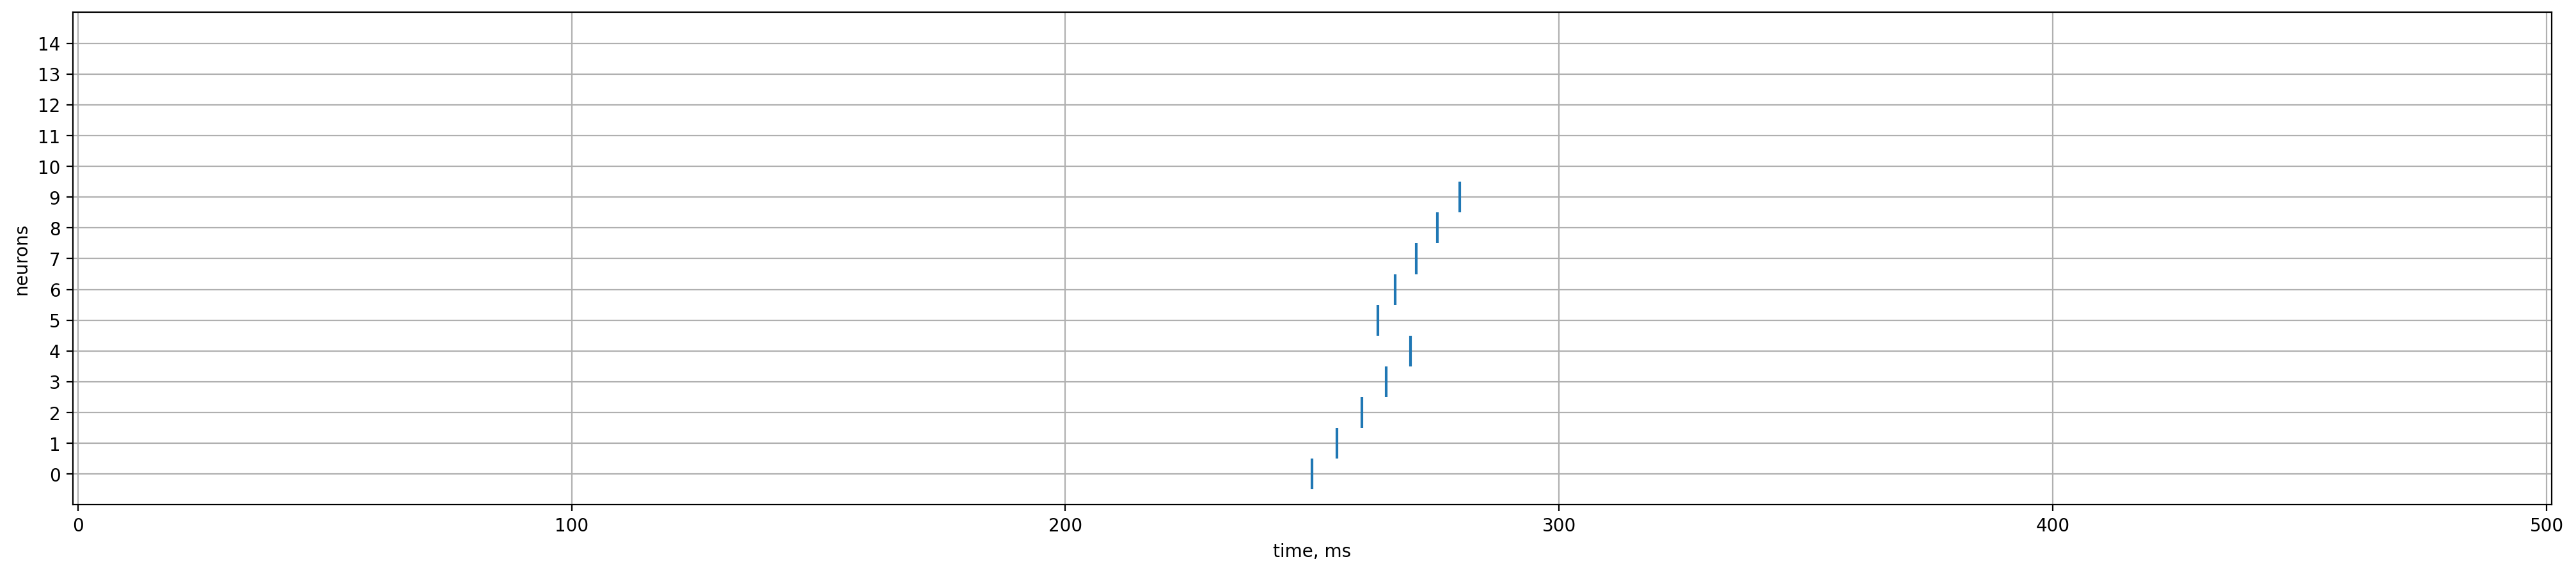

In [3]:
time = 500


model.syn_by_edge[1,6].w = 1
model.syn_by_edge[2,7].w = 1
model.syn_by_edge[3,8].w = 1
#model.set_scale(3.9)
model.set_rule_to_all(None)
reverse_signal(model)
gatherer = Gatherer(model)
for i in range(int(time / res)):
    model.tick()
    gatherer.gather_spikes_only()
data = gatherer.convert_spikes_for_raster()

gatherer.draw_raster(time=time)

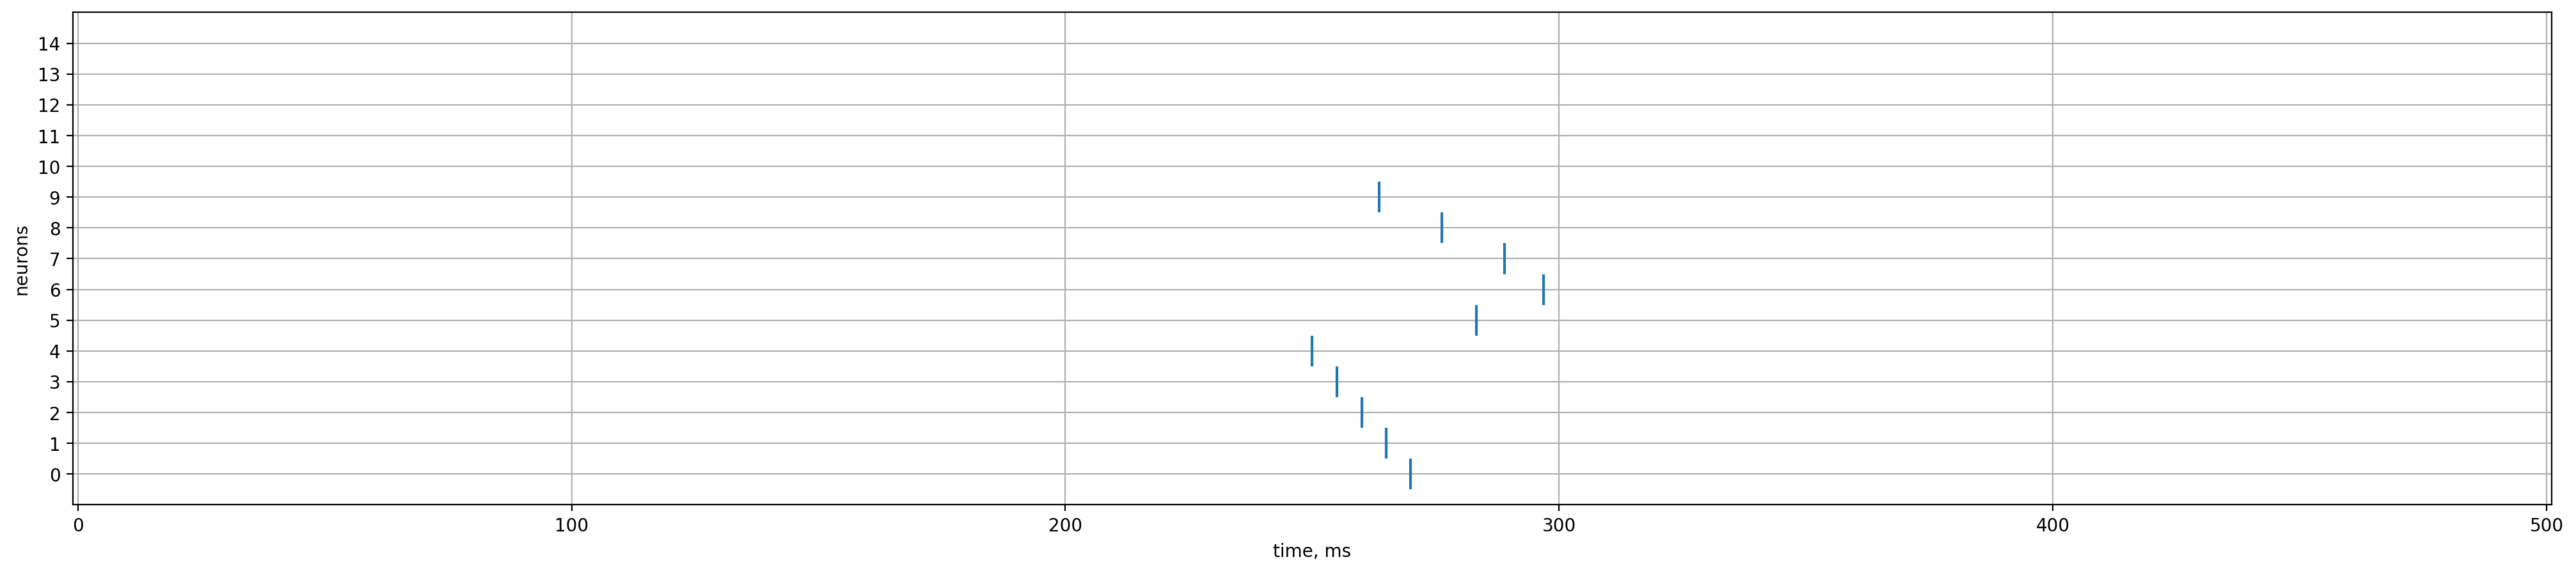

In [4]:
time = 500


model.syn_by_edge[1,6].w = 0
model.syn_by_edge[2,7].w = 0
model.syn_by_edge[3,8].w = 0
#model.set_scale(3.9)
model.set_rule_to_all(None)
reverse_signal(model)
gatherer = Gatherer(model)
for i in range(int(time / res)):
    model.tick()
    gatherer.gather_spikes_only()
data = gatherer.convert_spikes_for_raster()

gatherer.draw_raster(time=time)

In [5]:
clone = clone_model(model)
clone.remove_neurons([11,12,13,14,10])

def switch_order(model, ids):
    a = model[ids[0]].awaiting_time
    b = model[ids[1]].awaiting_time
    model[ids[0]].awaiting_time = b
    model[ids[1]].awaiting_time = a

In [6]:
# model.show_config()
clone.show_config()

{'Neurons': {0: <neurons.Spikes_at_will at 0x231a05e2450>,
  1: <neurons.Spikes_at_will at 0x231a04f6810>,
  2: <neurons.Spikes_at_will at 0x231a047ff90>,
  3: <neurons.Spikes_at_will at 0x231a0482dd0>,
  4: <neurons.Spikes_at_will at 0x231a0482ed0>,
  5: <neurons.Izhikevich at 0x2319e1fad50>,
  6: <neurons.Izhikevich at 0x2319f73de10>,
  7: <neurons.Izhikevich at 0x231a05f2090>,
  8: <neurons.Izhikevich at 0x231a058bb90>,
  9: <neurons.Izhikevich at 0x231a058bf10>},
 'Synapses': {(0, 5): <synaptics.Synapse at 0x231a058bfd0>,
  (1, 6): <synaptics.Synapse at 0x231a0618b10>,
  (2, 7): <synaptics.Synapse at 0x231a0563910>,
  (3, 8): <synaptics.Synapse at 0x231a05cc990>,
  (4, 9): <synaptics.Synapse at 0x231a06021d0>,
  (5, 6): <synaptics.Synapse at 0x231a477eb10>,
  (6, 5): <synaptics.Synapse at 0x231a477ea90>,
  (6, 7): <synaptics.Synapse at 0x231a051d650>,
  (7, 6): <synaptics.Synapse at 0x231a057e650>,
  (7, 8): <synaptics.Synapse at 0x231a0646890>,
  (8, 7): <synaptics.Synapse at 0x23

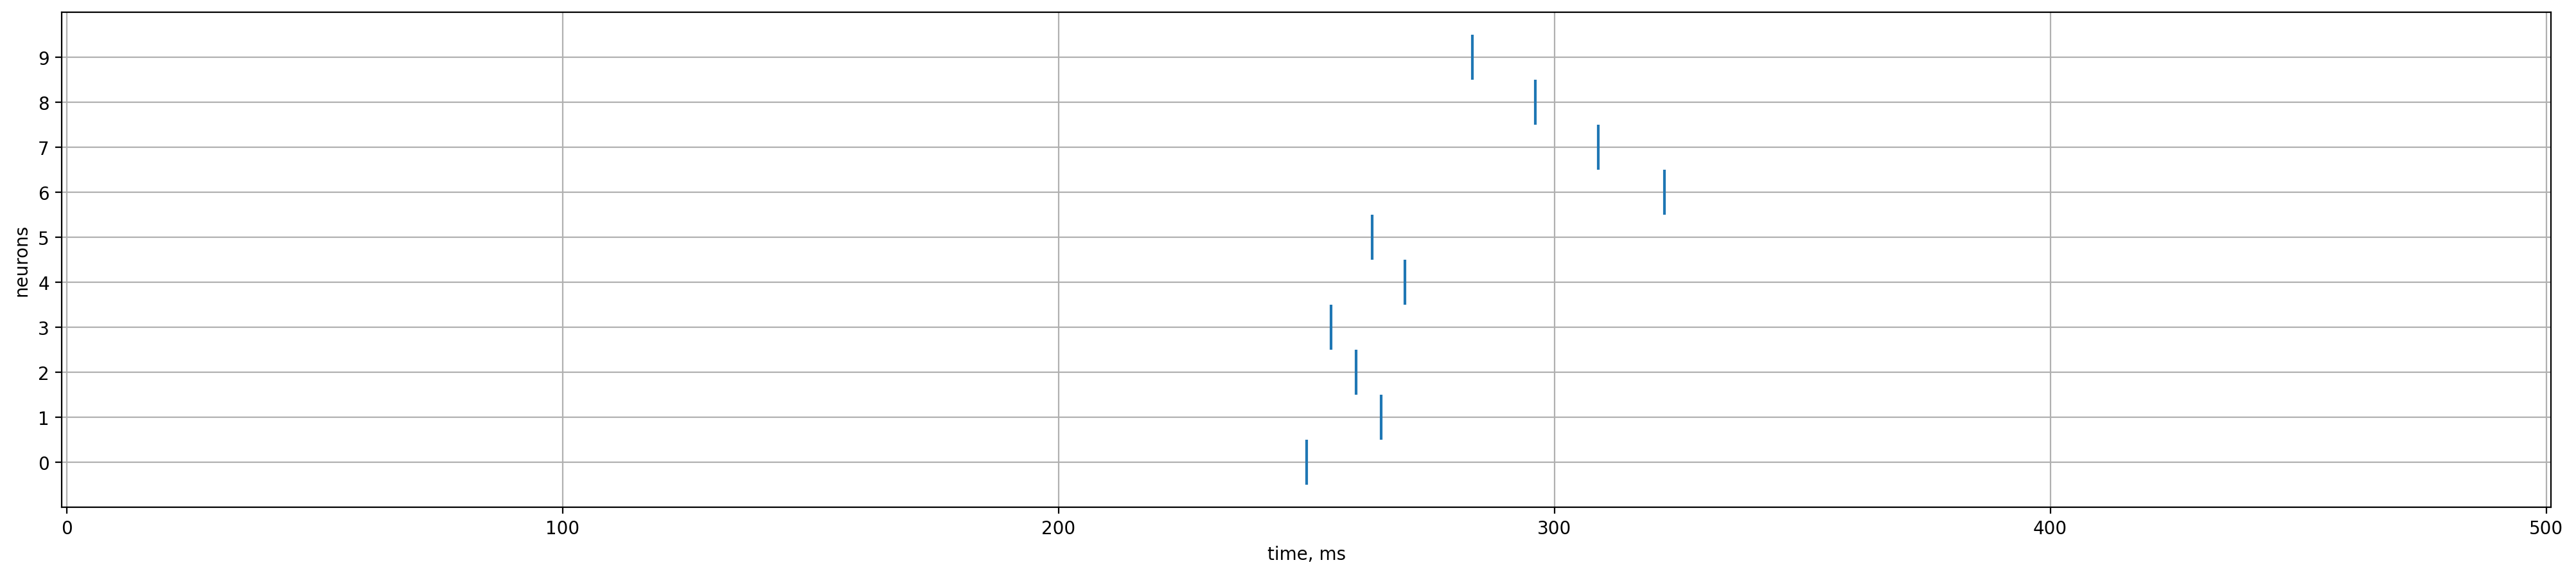

In [7]:
time = 500


clone.syn_by_edge[1,6].w = 0
clone.syn_by_edge[2,7].w = 0
clone.syn_by_edge[3,8].w = 0
#model.set_scale(3.9)
clone.set_rule_to_all(None)
switch_order(clone, [0, 4])
gatherer = Gatherer(clone)
for i in range(int(time / res)):
    clone.tick()
    gatherer.gather_spikes_only()
data = gatherer.convert_spikes_for_raster()

gatherer.draw_raster(time=time)

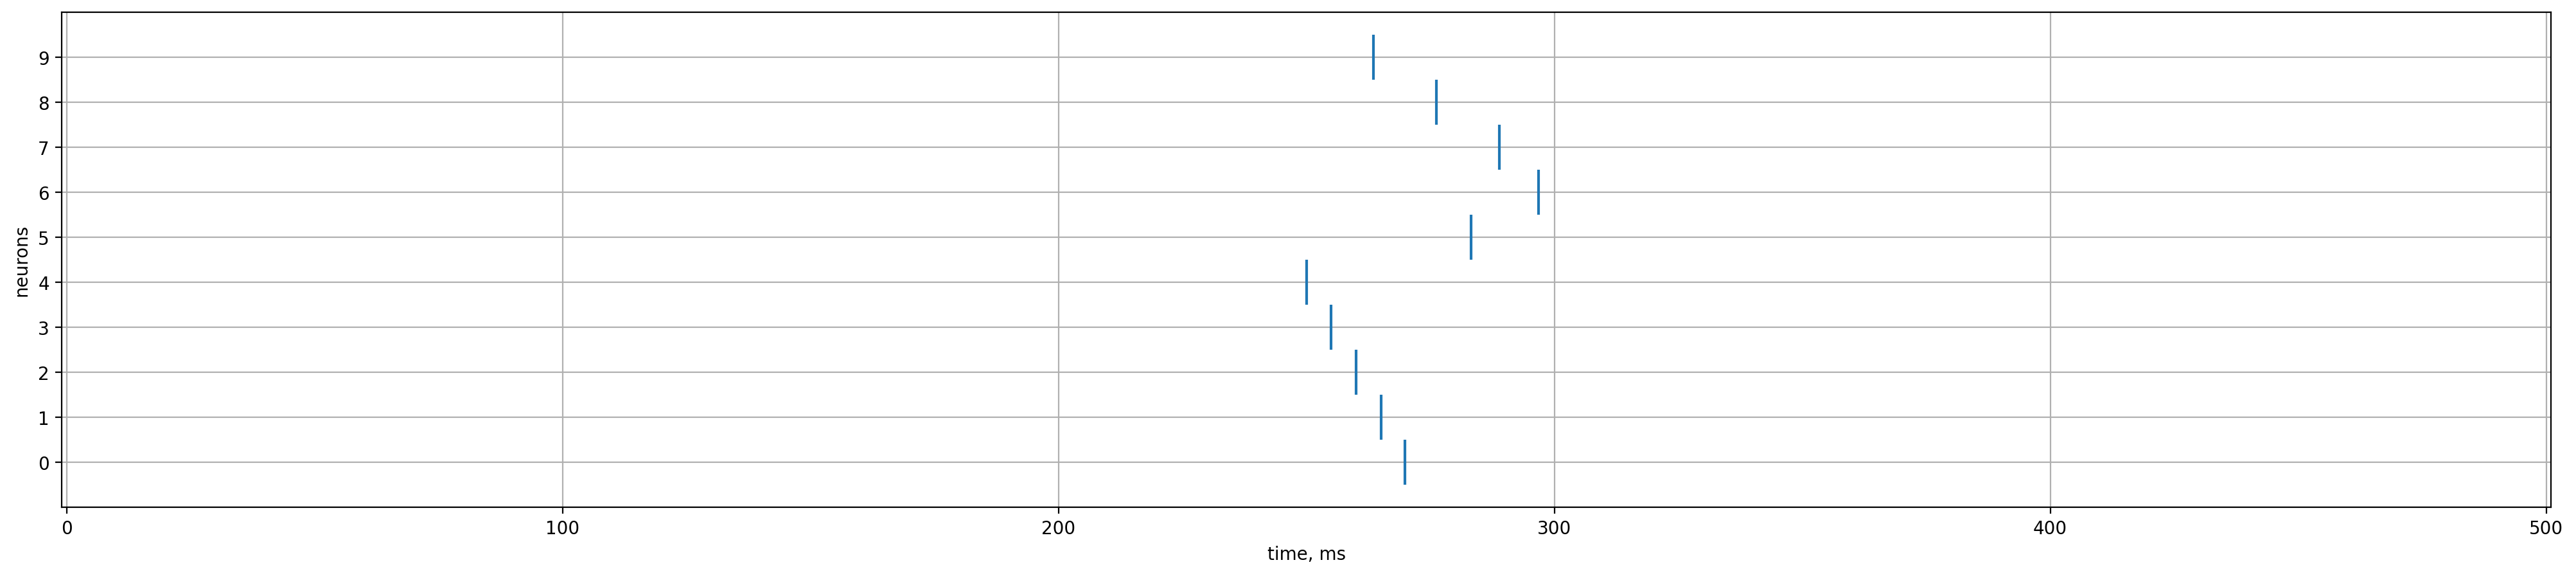

In [8]:
time = 500

# clone.remove_neurons([1,2,3])
# clone.syn_by_edge[2,7].w = 0
# clone.syn_by_edge[3,8].w = 0
#model.set_scale(3.9)
clone[1].turn_off()
clone[2].turn_off()
clone[3].turn_off()
clone.set_rule_to_all(None)
switch_order(clone, [0, 4])
gatherer = Gatherer(clone)
for i in range(int(time / res)):
    clone.tick()
    gatherer.gather_spikes_only()
data = gatherer.convert_spikes_for_raster()

gatherer.draw_raster(time=time)